In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Load data set

In [5]:
data=pd.read_csv("air line passenge.csv")
data

No     id  Gender      Customer Type  Age   Type of Travel  \
0          0  19556  Female     Loyal Customer   52  Business travel   
1          1  90035  Female     Loyal Customer   36  Business travel   
2          2  12360    Male  disloyal Customer   20  Business travel   
3          3  77959    Male     Loyal Customer   44  Business travel   
4          4  36875  Female     Loyal Customer   49  Business travel   
...      ...    ...     ...                ...  ...              ...   
25971  25971  78463    Male  disloyal Customer   34  Business travel   
25972  25972  71167    Male     Loyal Customer   23  Business travel   
25973  25973  37675  Female     Loyal Customer   17  Personal Travel   
25974  25974  90086    Male     Loyal Customer   14  Business travel   
25975  25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco              160                      5   
1      Business             2863                      1   
2           Eco              192                      2   
3      Business             3377                      0   
4           Eco             1182                      2   
...         ...              ...                    ...   
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                      4  ...                       5   
1                                      1  ...                       4   
2                                      0  ...                       2   
3                                      0  ...                       1   
4                                      3  ...                       2   
...                                  ...  ...                     ...   
25971                                  3  ...                       4   
25972                                  4  ...                       4   
25973                                  5  ...                       2   
25974                                  3  ...                       4   
25975                                  5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
0                     5                 5                 5                2   
1                     4                 4                 4                3   
2                     4                 1                 3                2   
3                     1                 1                 1                3   
4                     2                 2                 2                4   
...                 ...               ...               ...              ...   
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
0                     5            5                          50   
1                     4            5                           0   
2                     2            2                           0   
3                     1            4                           0   
4                     2            4                           0   
...                 ...          ...                         ...   
25971                 5            4                           0   
25972                 5            4                  

In [10]:
data.head()

No     id  Gender      Customer Type  Age   Type of Travel     Class  \
0   0  19556  Female     Loyal Customer   52  Business travel       Eco   
1   1  90035  Female     Loyal Customer   36  Business travel  Business   
2   2  12360    Male  disloyal Customer   20  Business travel       Eco   
3   3  77959    Male     Loyal Customer   44  Business travel  Business   
4   4  36875  Female     Loyal Customer   49  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   ...  Inflight entertainment  On-board service  Leg room service  \
0  ...                       5                 5                 5   
1  ...                       4                 4                 4   
2  ...                       2                 4                 1   
3  ...                       1                 1                 1   
4  ...                       2                 2                 2   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   
2                 3                2                 2            2   
3                 1                3                 1            4   
4                 2                4                 2            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          50                      44.0   
1                           0                       0.0   
2                           0                       0.0   
3                           0                       6.0   
4                           0                      20.0   

              satisfaction  
0                satisfied  
1                satisfied  
2  neutral or dissatisfied  
3                satisfied  
4                satisfied  

[5 rows x 25 columns]

In [12]:
data.tail()

No     id  Gender      Customer Type  Age   Type of Travel  \
25971  25971  78463    Male  disloyal Customer   34  Business travel   
25972  25972  71167    Male     Loyal Customer   23  Business travel   
25973  25973  37675  Female     Loyal Customer   17  Personal Travel   
25974  25974  90086    Male     Loyal Customer   14  Business travel   
25975  25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
25971                                  3  ...                       4   
25972                                  4  ...                       4   
25973                                  5  ...                       2   
25974                                  3  ...                       4   
25975                                  5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
25971                 5            4                           0   
25972                 5            4                           0   
25973                 4            2                           0   
25974                 5            4                           0   
25975                 1            1                           0   

       Arrival Delay in Minutes             satisfaction  
25971                       0.0  neutral or dissatisfied  
25972                       0.0                satisfied  
25973                       0.0  neutral or dissatisfied  
25974                       0.0                satisfied  
25975                       0.0  neutral or dissatisfied  

[5 rows x 25 columns]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   No                                 25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [16]:
data.describe()

No             id           Age  Flight Distance  \
count  25976.000000   25976.000000  25976.000000     25976.000000   
mean   12987.500000   65005.657992     39.620958      1193.788459   
std     7498.769632   37611.526647     15.135685       998.683999   
min        0.000000      17.000000      7.000000        31.000000   
25%     6493.750000   32170.500000     27.000000       414.000000   
50%    12987.500000   65319.500000     40.000000       849.000000   
75%    19481.250000   97584.250000     51.000000      1744.000000   
max    25975.000000  129877.000000     85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count           25976.000000                       25976.000000   
mean                2.724746                           3.046812   
std                 1.335384                           1.533371   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count            25976.000000   25976.000000    25976.000000     25976.000000   
mean                 2.756775       2.977094        3.215353         3.261665   
std                  1.412951       1.282133        1.331506         1.355536   
min                  0.000000       1.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         4.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

       Seat comfort  Inflight entertainment  On-board service  \
count  25976.000000            25976.000000      25976.000000   
mean       3.449222                3.357753          3.385664   
std        1.320090                1.338299          1.282088   
min        1.000000                0.000000          0.000000   
25%        2.000000                2.000000          2.000000   
50%        4.000000                4.000000          4.000000   
75%        5.000000                4.000000          4.000000   
max        5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count      25976.000000      25976.000000     25976.000000      25976.000000   
mean           3.350169          3.633238         3.314175          3.649253   
std            1.318862          1.176525         1.269332          1.180681   
min            0.000000          1.000000         1.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  25976.000000                 25976.00000              25893.000000  
mean       3.286226                    14.30609                 14.740857  
std        1.319330                    37.42316                 37.517539  
min        0.000000                     0.00000                  0.000000  
25%        2.000000                     0.00000                  0.000000  
50%        3.000000                     0.00000                  0.000000  
75%        4.000000                    12.00000                 13.000000  
max        5.000000                  1128.00000               1115.000000

### EDA

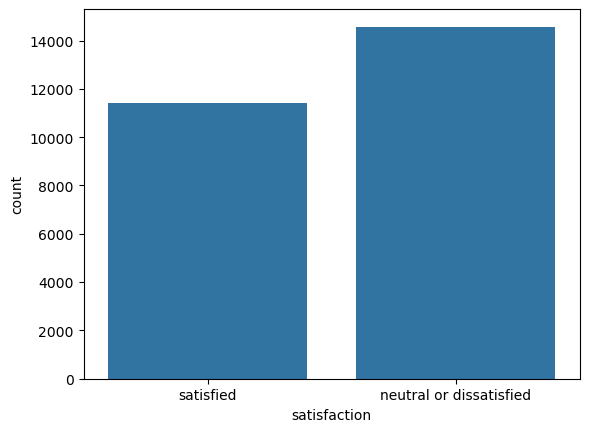

In [9]:
# target variable count plot
sns.countplot(data=data,x="satisfaction")
plt.show()

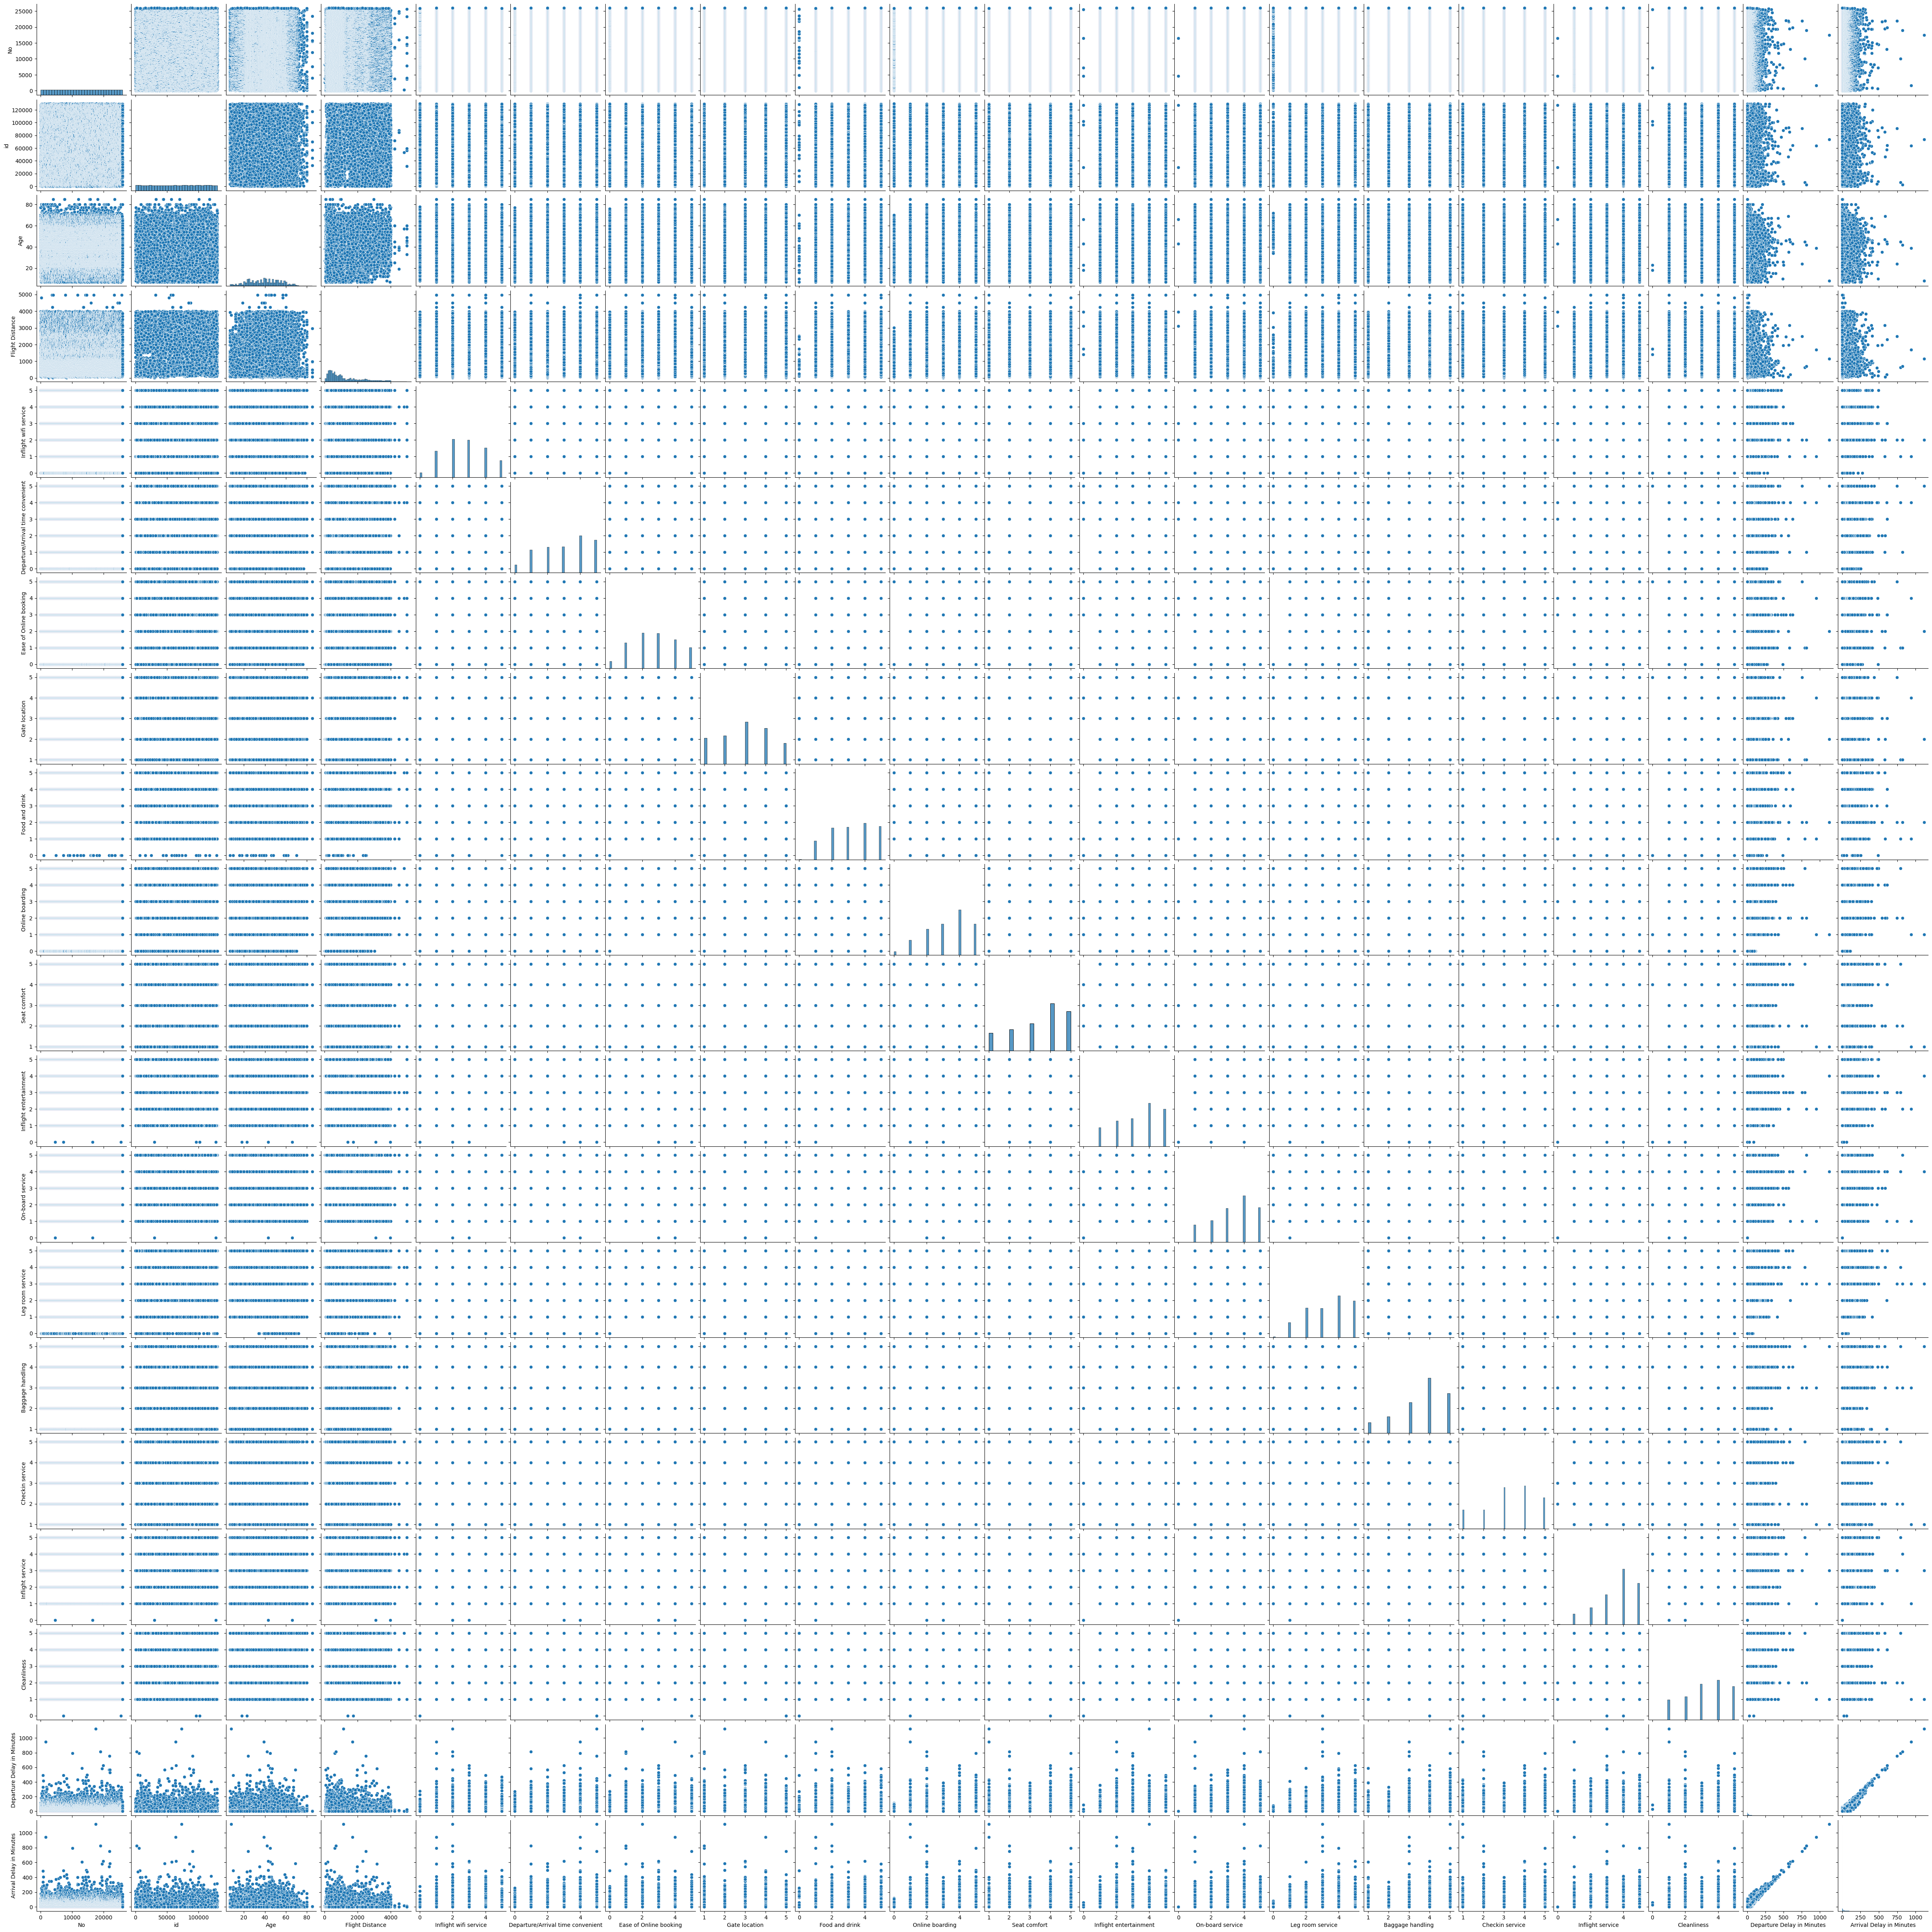

In [19]:
sns.pairplot(data)

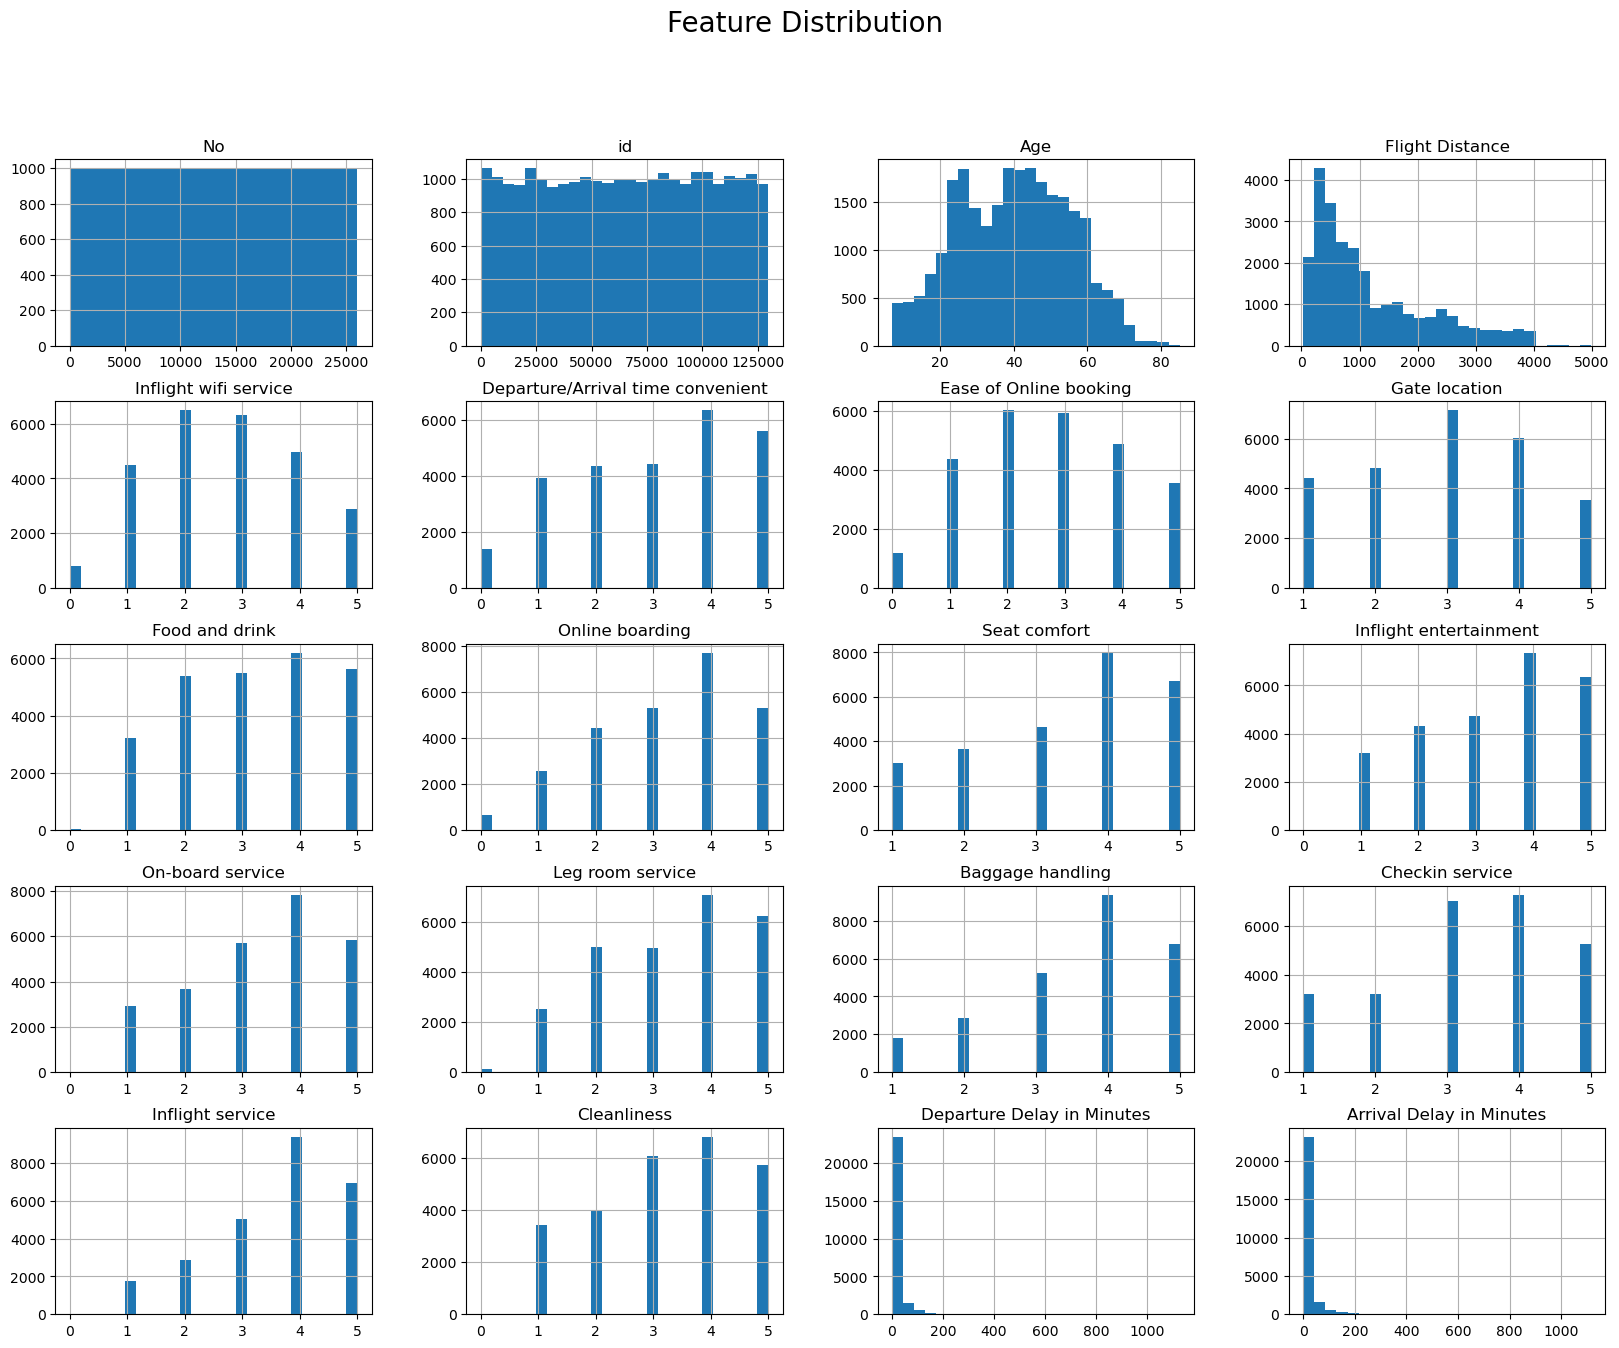

In [20]:
#hisplot
data.hist(figsize=(20,15),bins=26)
plt.suptitle("Feature Distribution",fontsize=20)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'No'),
  Text(1, 0, 'id'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Flight Distance'),
  Text(4, 0, 'Inflight wifi service'),
  Text(5, 0, 'Departure/Arrival time convenient'),
  Text(6, 0, 'Ease of Online booking'),
  Text(7, 0, 'Gate location'),
  Text(8, 0, 'Food and drink'),
  Text(9, 0, 'Online boarding'),
  Text(10, 0, 'Seat comfort'),
  Text(11, 0, 'Inflight entertainment'),
  Text(12, 0, 'On-board service'),
  Text(13, 0, 'Leg room service'),
  Text(14, 0, 'Baggage handling'),
  Text(15, 0, 'Checkin service'),
  Text(16, 0, 'Inflight service'),
  Text(17, 0, 'Cleanliness'),
  Text(18, 0, 'Departure Delay in Minutes'),
  Text(19, 0, 'Arrival Delay in Minutes')])

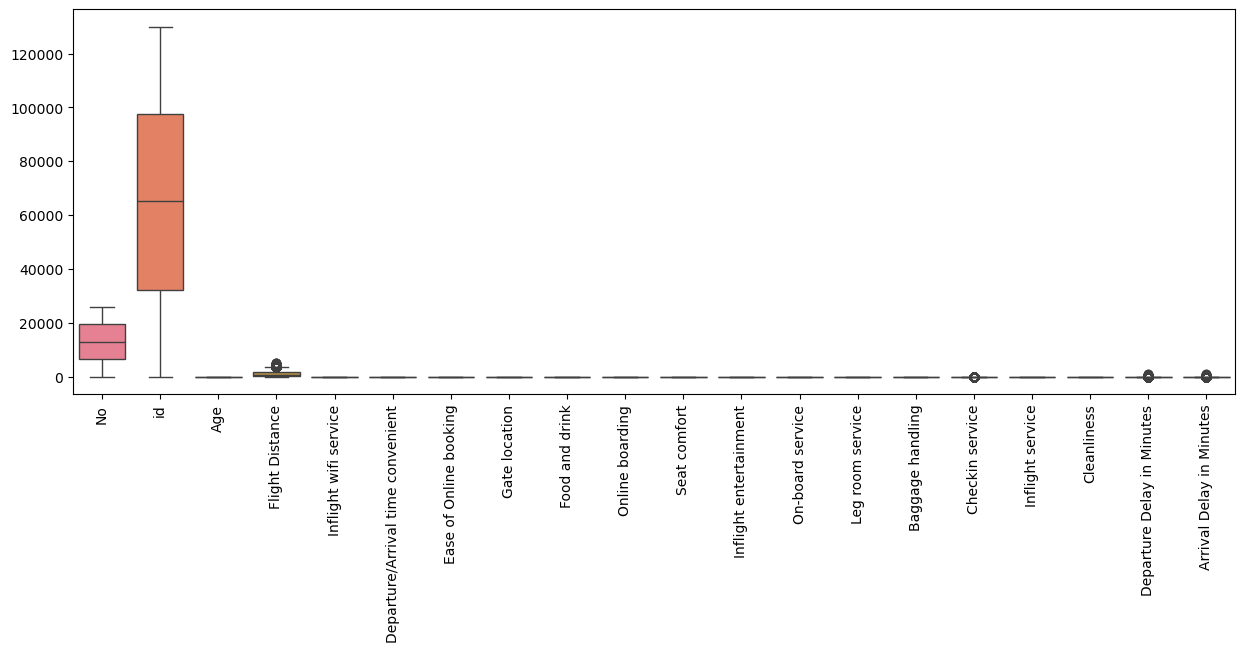

In [22]:
#Boxplot
plt.figure(figsize=(15,5))
sns.boxplot(data)
plt.xticks(rotation=90)

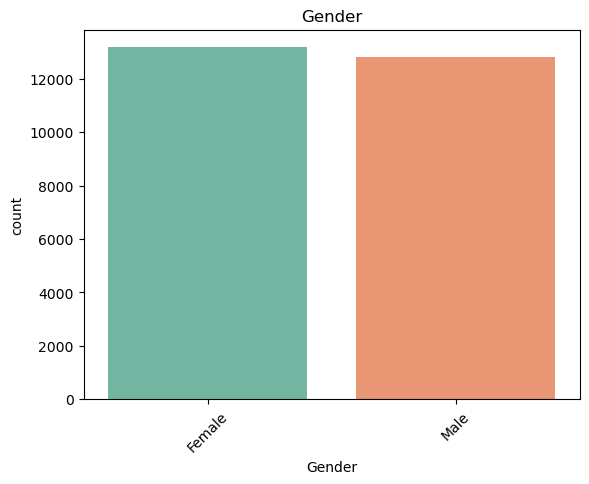

In [23]:
#countplot
abc = sns.countplot(data=data, x='Gender', palette='Set2')
plt.xticks(rotation=45)
plt.title("Gender")
plt.show()

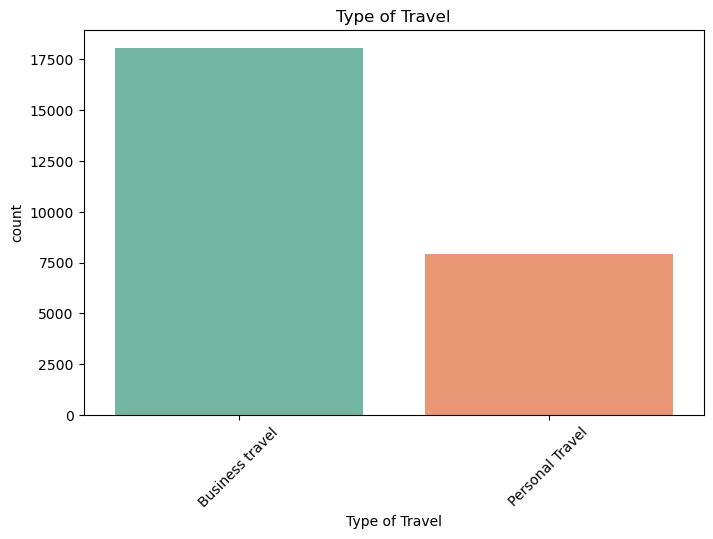

In [24]:
plt.figure(figsize=(8,5))
abc = sns.countplot(data=data, x='Type of Travel', palette='Set2')
plt.xticks(rotation=45)
plt.title("Type of Travel")
plt.show()

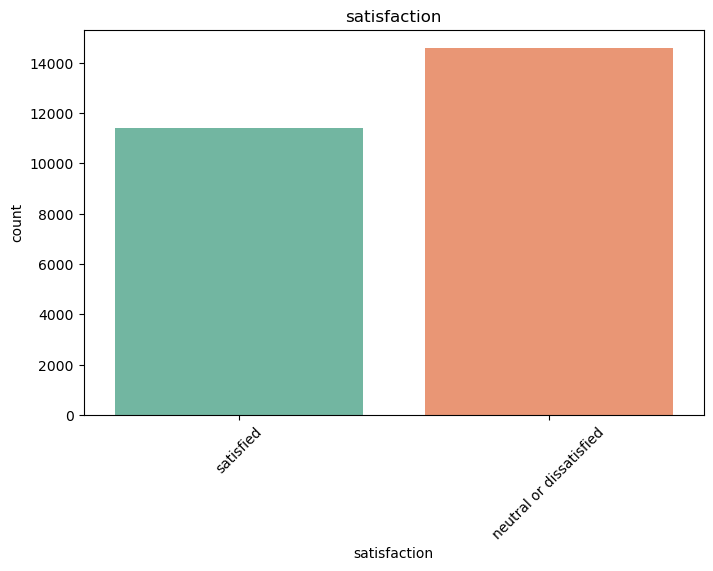

In [25]:
plt.figure(figsize=(8,5))
abc = sns.countplot(data=data, x='satisfaction', palette='Set2')
plt.xticks(rotation=45)
plt.title("satisfaction")
plt.show()

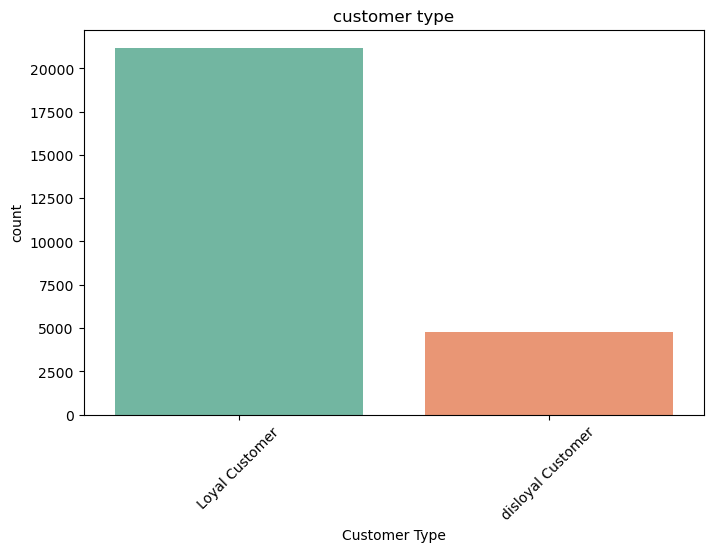

In [26]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=data,x='Customer Type',palette='Set2')
plt.xticks(rotation=45)
plt.title("customer type")
plt.show()

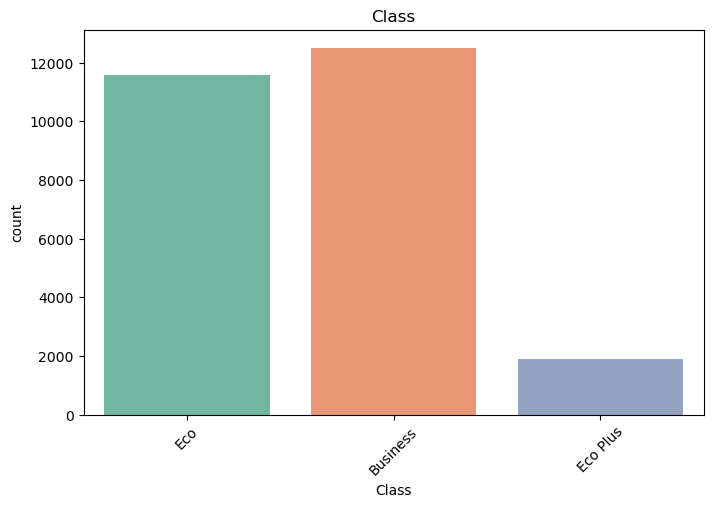

In [27]:

plt.figure(figsize=(8,5))
abc = sns.countplot(data=data, x='Class', palette='Set2')
plt.xticks(rotation=45)
plt.title("Class")
plt.show()

In [28]:
#correlation
correlation=data.select_dtypes(include="number").corr()
correlation

No        id       Age  \
No                                 1.000000  0.006946 -0.007964   
id                                 0.006946  1.000000  0.010211   
Age                               -0.007964  0.010211  1.000000   
Flight Distance                   -0.002470  0.095335  0.099409   
Inflight wifi service             -0.003085 -0.030303  0.009242   
Departure/Arrival time convenient -0.003962 -0.002502  0.032449   
Ease of Online booking            -0.002011  0.010389  0.013565   
Gate location                     -0.001360  0.001843  0.003308   
Food and drink                    -0.010858 -0.006789  0.023841   
Online boarding                   -0.000254  0.055767  0.202058   
Seat comfort                      -0.005602  0.049212  0.154507   
Inflight entertainment            -0.012927 -0.001078  0.068998   
On-board service                   0.001180  0.056544  0.054977   
Leg room service                  -0.004194  0.041921  0.033299   
Baggage handling                   0.000349  0.073085 -0.049863   
Checkin service                    0.002773  0.079521  0.025388   
Inflight service                  -0.008069  0.076587 -0.059083   
Cleanliness                       -0.005058  0.020411  0.048418   
Departure Delay in Minutes        -0.005948 -0.009884 -0.004334   
Arrival Delay in Minutes          -0.002974 -0.029090 -0.007400   

                                   Flight Distance  Inflight wifi service  \
No                                       -0.002470              -0.003085   
id                                        0.095335              -0.030303   
Age                                       0.099409               0.009242   
Flight Distance                           1.000000               0.005007   
Inflight wifi service                     0.005007               1.000000   
Departure/Arrival time convenient        -0.014401               0.349137   
Ease of Online booking                    0.062989               0.710684   
Gate location                             0.008410               0.347790   
Food and drink                            0.057322               0.122306   
Online boarding                           0.214629               0.459366   
Seat comfort                              0.158957               0.116991   
Inflight entertainment                    0.137538               0.201782   
On-board service                          0.117880               0.113658   
Leg room service                          0.136995               0.159699   
Baggage handling                          0.071549               0.118199   
Checkin service                           0.075720               0.046046   
Inflight service                          0.066355               0.108419   
Cleanliness                               0.105578               0.125768   
Departure Delay in Minutes                0.003446              -0.010078   
Arrival Delay in Minutes                  0.000131              -0.012277   

                                   Departure/Arrival time convenient  \
No                                                         -0.003962   
id                                                         -0.002502   
Age                                                         0.032449   
Flight Distance                                            -0.014401   
Inflight wifi service                                       0.349137   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.440230   
Gate location                                               0.458439   
Food and drink                                             -0.016006   
Online boarding                                             0.080937   
Seat comfort                                               -0.001926   
Inflight entertainment                                     -0.022326   
On-board service                                            0.060982   
Leg roo

<Axes: >

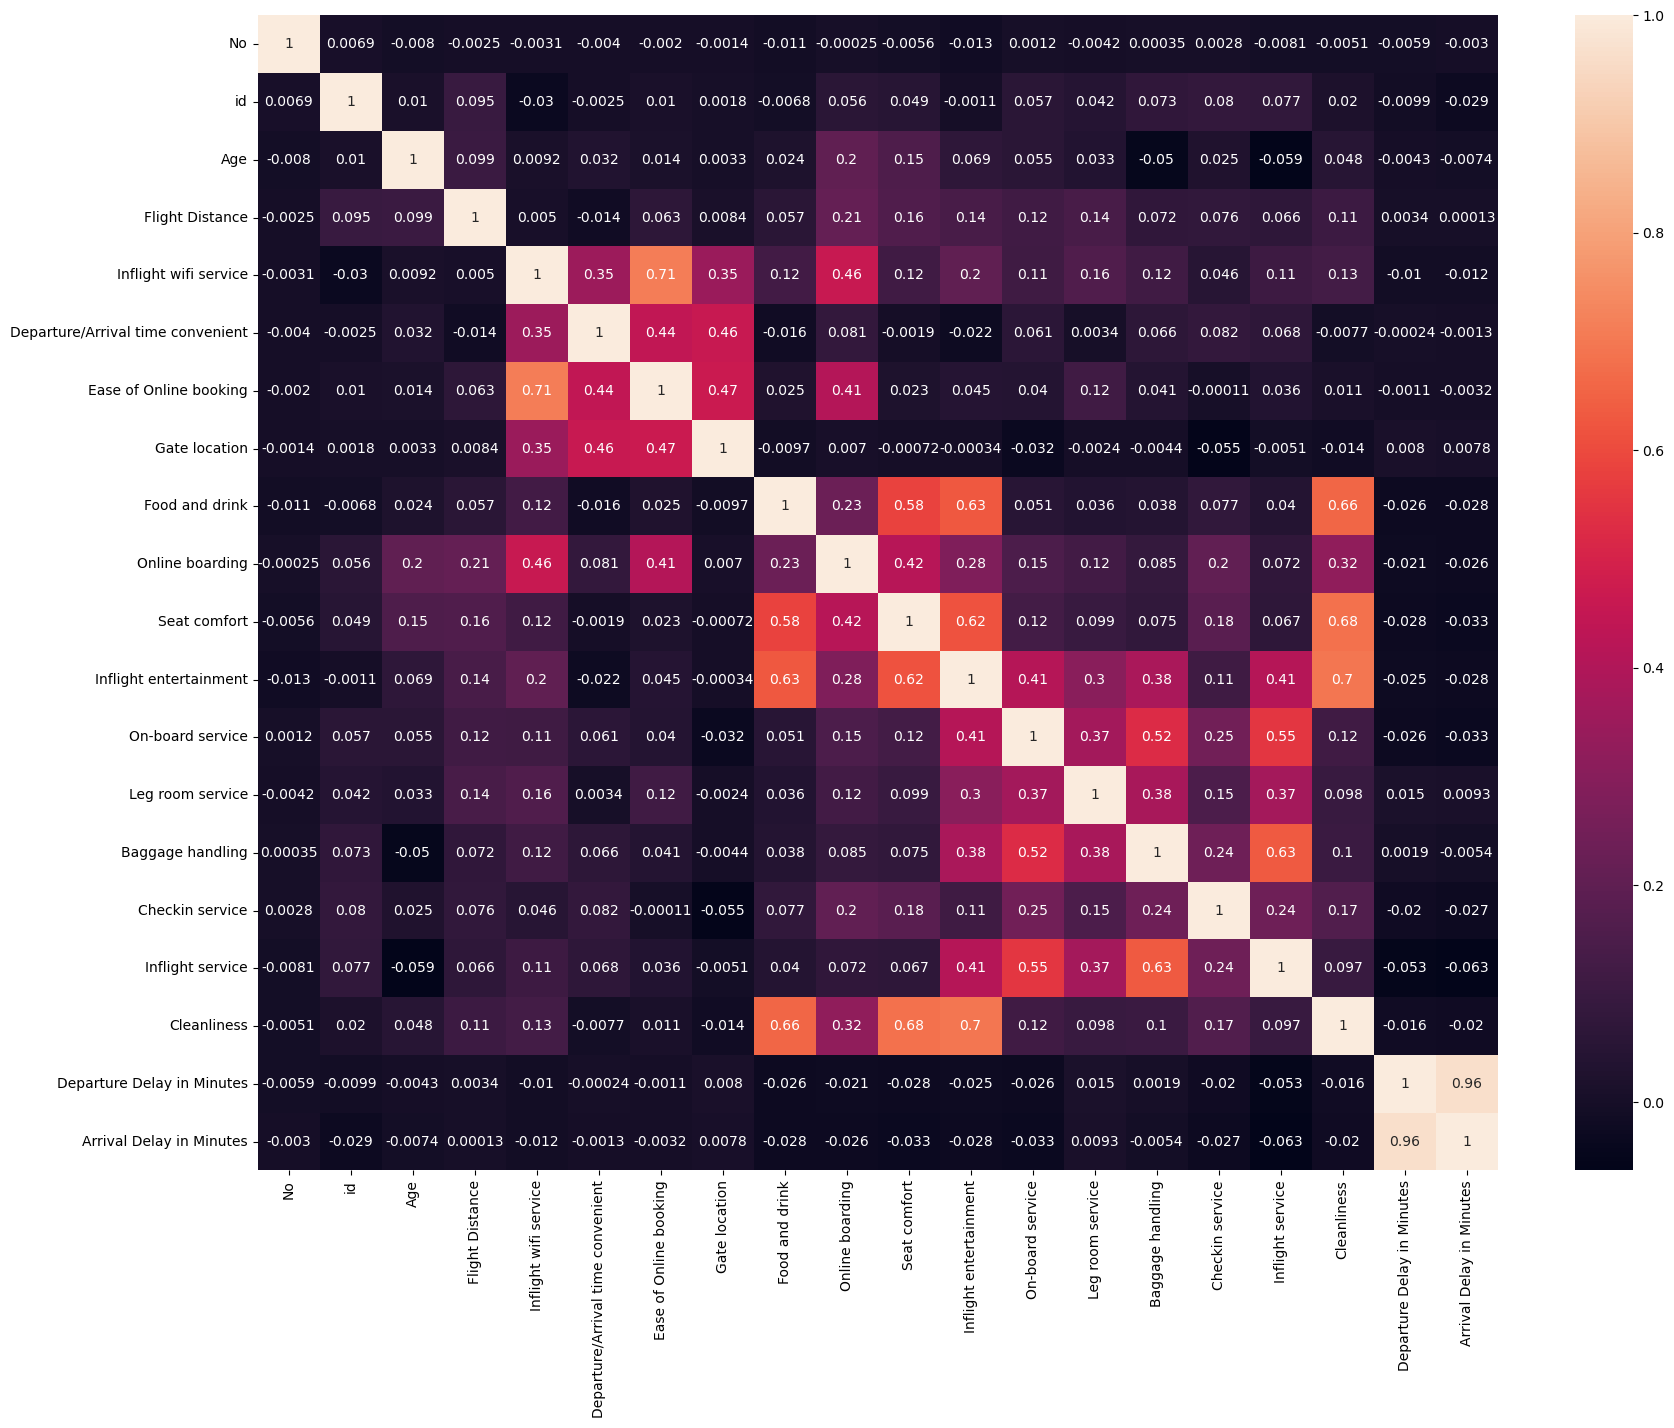

In [29]:
#Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(correlation,annot=True)

### preprocessing

In [31]:
data.shape

(25976, 25)

In [32]:
data.dtypes

No                                     int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [33]:
data.size

649400

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   No                                 25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [35]:
data.isnull().sum()

No                                    0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [36]:
data.describe

<bound method NDFrame.describe of           No     id  Gender      Customer Type  Age   Type of Travel  \
0          0  19556  Female     Loyal Customer   52  Business travel   
1          1  90035  Female     Loyal Customer   36  Business travel   
2          2  12360    Male  disloyal Customer   20  Business travel   
3          3  77959    Male     Loyal Customer   44  Business travel   
4          4  36875  Female     Loyal Customer   49  Business travel   
...      ...    ...     ...                ...  ...              ...   
25971  25971  78463    Male  disloyal Customer   34  Business travel   
25972  25972  71167    Male     Loyal Customer   23  Business travel   
25973  25973  37675  Female     Loyal Customer   17  Personal Travel   
25974  25974  90086    Male     Loyal Customer   14  Business travel   
25975  25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco              160          

In [37]:
data.head()

No     id  Gender      Customer Type  Age   Type of Travel     Class  \
0   0  19556  Female     Loyal Customer   52  Business travel       Eco   
1   1  90035  Female     Loyal Customer   36  Business travel  Business   
2   2  12360    Male  disloyal Customer   20  Business travel       Eco   
3   3  77959    Male     Loyal Customer   44  Business travel  Business   
4   4  36875  Female     Loyal Customer   49  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   ...  Inflight entertainment  On-board service  Leg room service  \
0  ...                       5                 5                 5   
1  ...                       4                 4                 4   
2  ...                       2                 4                 1   
3  ...                       1                 1                 1   
4  ...                       2                 2                 2   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   
2                 3                2                 2            2   
3                 1                3                 1            4   
4                 2                4                 2            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          50                      44.0   
1                           0                       0.0   
2                           0                       0.0   
3                           0                       6.0   
4                           0                      20.0   

              satisfaction  
0                satisfied  
1                satisfied  
2  neutral or dissatisfied  
3                satisfied  
4                satisfied  

[5 rows x 25 columns]

In [38]:
data.tail()

No     id  Gender      Customer Type  Age   Type of Travel  \
25971  25971  78463    Male  disloyal Customer   34  Business travel   
25972  25972  71167    Male     Loyal Customer   23  Business travel   
25973  25973  37675  Female     Loyal Customer   17  Personal Travel   
25974  25974  90086    Male     Loyal Customer   14  Business travel   
25975  25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
25971                                  3  ...                       4   
25972                                  4  ...                       4   
25973                                  5  ...                       2   
25974                                  3  ...                       4   
25975                                  5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
25971                 5            4                           0   
25972                 5            4                           0   
25973                 4            2                           0   
25974                 5            4                           0   
25975                 1            1                           0   

       Arrival Delay in Minutes             satisfaction  
25971                       0.0  neutral or dissatisfied  
25972                       0.0                satisfied  
25973                       0.0  neutral or dissatisfied  
25974                       0.0                satisfied  
25975                       0.0  neutral or dissatisfied  

[5 rows x 25 columns]

In [39]:
data.columns

Index(['No', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [40]:
data.duplicated().sum()

0

In [41]:
data.describe().T

count          mean           std   min  \
No                                 25976.0  12987.500000   7498.769632   0.0   
id                                 25976.0  65005.657992  37611.526647  17.0   
Age                                25976.0     39.620958     15.135685   7.0   
Flight Distance                    25976.0   1193.788459    998.683999  31.0   
Inflight wifi service              25976.0      2.724746      1.335384   0.0   
Departure/Arrival time convenient  25976.0      3.046812      1.533371   0.0   
Ease of Online booking             25976.0      2.756775      1.412951   0.0   
Gate location                      25976.0      2.977094      1.282133   1.0   
Food and drink                     25976.0      3.215353      1.331506   0.0   
Online boarding                    25976.0      3.261665      1.355536   0.0   
Seat comfort                       25976.0      3.449222      1.320090   1.0   
Inflight entertainment             25976.0      3.357753      1.338299   0.0   
On-board service                   25976.0      3.385664      1.282088   0.0   
Leg room service                   25976.0      3.350169      1.318862   0.0   
Baggage handling                   25976.0      3.633238      1.176525   1.0   
Checkin service                    25976.0      3.314175      1.269332   1.0   
Inflight service                   25976.0      3.649253      1.180681   0.0   
Cleanliness                        25976.0      3.286226      1.319330   0.0   
Departure Delay in Minutes         25976.0     14.306090     37.423160   0.0   
Arrival Delay in Minutes           25893.0     14.740857     37.517539   0.0   

                                        25%      50%       75%       max  
No                                  6493.75  12987.5  19481.25   25975.0  
id                                 32170.50  65319.5  97584.25  129877.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    849.0   1744.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      4.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1128.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1115.0

### outlier removal

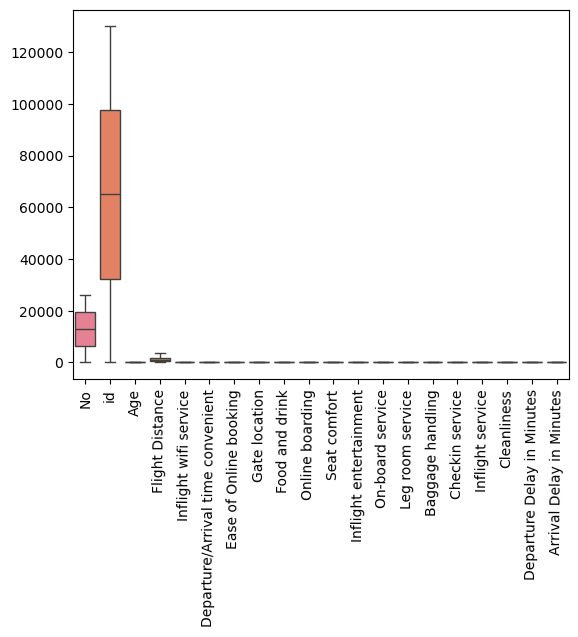

In [43]:
lst=['Flight Distance','Checkin service','Departure Delay in Minutes','Arrival Delay in Minutes']	
for i in lst:
  Q1=data[i].quantile(0.25)
  Q3=data[i].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  data.loc[(data[i]>=upper_limit),i]=upper_limit
  data.loc[(data[i]<=lower_limit),i]=lower_limit
sns.boxplot(data)

plt.xticks(rotation=89.5)
plt.show()

### LabelEncoding

In [45]:
le=LabelEncoder()

In [46]:
data["Gender"]=le.fit_transform(data["Gender"])

In [47]:
le1=LabelEncoder()
data["Customer Type"]=le1.fit_transform(data["Customer Type"])

In [48]:
le2=LabelEncoder()
data["Type of Travel"]=le2.fit_transform(data["Type of Travel"])

In [49]:
le3=LabelEncoder()
data["Class"]=le3.fit_transform(data["Class"])

In [50]:
le4=LabelEncoder()
data["satisfaction"]=le4.fit_transform(data["satisfaction"])

In [51]:
# fill null values
mean=data["Arrival Delay in Minutes"].mean()
data["Arrival Delay in Minutes"]=data["Arrival Delay in Minutes"].fillna(mean)

In [52]:
data.isna().sum()

No                                   0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [53]:
data

No     id  Gender  Customer Type  Age  Type of Travel  Class  \
0          0  19556       0              0   52               0      1   
1          1  90035       0              0   36               0      0   
2          2  12360       1              1   20               0      1   
3          3  77959       1              0   44               0      0   
4          4  36875       0              0   49               0      1   
...      ...    ...     ...            ...  ...             ...    ...   
25971  25971  78463       1              1   34               0      0   
25972  25972  71167       1              0   23               0      0   
25973  25973  37675       0              0   17               1      1   
25974  25974  90086       1              0   14               0      0   
25975  25975  34799       0              0   42               1      1   

       Flight Distance  Inflight wifi service  \
0                  160                      5   
1                 2863                      1   
2                  192                      2   
3                 3377                      0   
4                 1182                      2   
...                ...                    ...   
25971              526                      3   
25972              646                      4   
25973              828                      2   
25974             1127                      3   
25975              264                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                      4  ...                       5   
1                                      1  ...                       4   
2                                      0  ...                       2   
3                                      0  ...                       1   
4                                      3  ...                       2   
...                                  ...  ...                     ...   
25971                                  3  ...                       4   
25972                                  4  ...                       4   
25973                                  5  ...                       2   
25974                                  3  ...                       4   
25975                                  5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
0                     5                 5                 5              2.0   
1                     4                 4                 4              3.0   
2                     4                 1                 3              2.0   
3                     1                 1                 1              3.0   
4                     2                 2                 2              4.0   
...                 ...               ...               ...              ...   
25971                 3                 2                 4              4.0   
25972                 4                 5                 5              5.0   
25973                 4                 3                 4              5.0   
25974                 3                 2                 5              4.0   
25975                 1                 2                 1              1.5   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
0                     5            5                          30   
1                     4            5                           0   
2                     2            2                           0   
3                     1            4                           0   
4                     2            4                           0   
...                 ...          ...                         ...   
25971                 5            4                           0   
25972                 5            4                           0   
25973                 4            2                           0   
25974         

In [66]:
data=data.drop(["No","id"],axis=1,errors="ignore")
data

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0           0              0   52               0      1              160   
1           0              0   36               0      0             2863   
2           1              1   20               0      1              192   
3           1              0   44               0      0             3377   
4           0              0   49               0      1             1182   
...       ...            ...  ...             ...    ...              ...   
25971       1              1   34               0      0              526   
25972       1              0   23               0      0              646   
25973       0              0   17               1      1              828   
25974       1              0   14               0      0             1127   
25975       0              0   42               1      1              264   

       Inflight wifi service  Departure/Arrival time convenient  \
0                          5                                  4   
1                          1                                  1   
2                          2                                  0   
3                          0                                  0   
4                          2                                  3   
...                      ...                                ...   
25971                      3                                  3   
25972                      4                                  4   
25973                      2                                  5   
25974                      3                                  3   
25975                      2                                  5   

       Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                           3              4  ...                       5   
1                           3              1  ...                       4   
2                           2              4  ...                       2   
3                           0              2  ...                       1   
4                           4              3  ...                       2   
...                       ...            ...  ...                     ...   
25971                       3              1  ...                       4   
25972                       4              4  ...                       4   
25973                       1              5  ...                       2   
25974                       3              3  ...                       4   
25975                       2              5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
0                     5                 5                 5              2.0   
1                     4                 4                 4              3.0   
2                     4                 1                 3              2.0   
3                     1                 1                 1              3.0   
4                     2                 2                 2              4.0   
...                 ...               ...               ...              ...   
25971                 3                 2                 4              4.0   
25972                 4                 5                 5              5.0   
25973                 4                 3                 4              5.0   
25974                 3                 2                 5              4.0   
25975                 1                 2                 1              1.5   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
0                     5            5                          30   
1                     4            5                           0   
2                     2            2                           0   
3                     1            4                           0   
4                     2            4               

In [67]:
x=data.drop('satisfaction',axis=1)
y=data.iloc[:,-1]

In [68]:
x.shape


(25976, 22)

In [69]:
y.shape

(25976,)

In [70]:
y

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int32

### Train Test Split

In [72]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)

#### LOGISTICREGRESSION

Test score: 0.8720169361046959
train score: 0.8711260827718961
CR:               precision    recall  f1-score   support

           0       0.88      0.90      0.89      2917
           1       0.87      0.84      0.85      2279

    accuracy                           0.87      5196
   macro avg       0.87      0.87      0.87      5196
weighted avg       0.87      0.87      0.87      5196

Test accuracy: 87.20169361046959
Train accuracy: 87.11260827718961


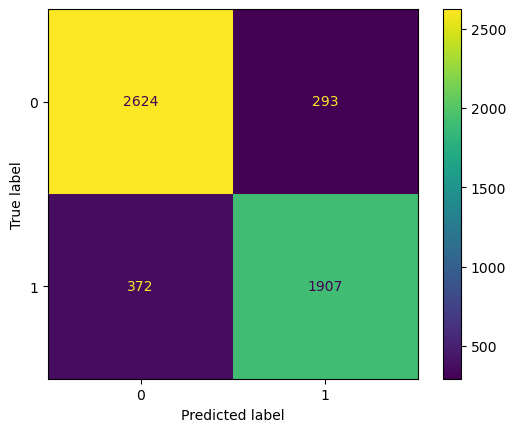

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test score:',lr.score(x_test,y_test))
print('train score:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrt=accuracy_score(y_test,y_testpred)*100
lrr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrt)
print('Train accuracy:',lrr)

#### KNN

Test score: 0.9189761354888376
train score: 0.9397016361886429
CR:               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2917
           1       0.94      0.87      0.90      2279

    accuracy                           0.92      5196
   macro avg       0.92      0.91      0.92      5196
weighted avg       0.92      0.92      0.92      5196

Test accuracy: 91.89761354888375
Train accuracy: 93.97016361886429


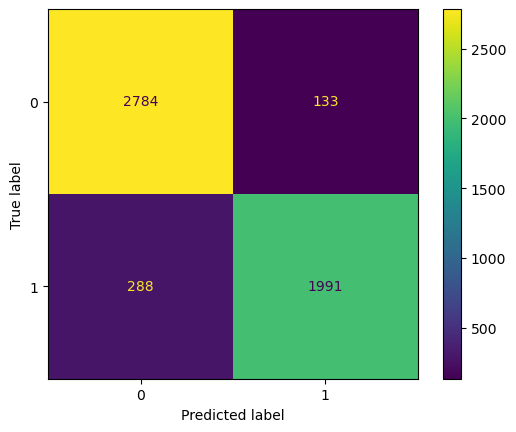

In [78]:

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test score:',knn.score(x_test,y_test))
print('train score:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnt=accuracy_score(y_test,y_testpred)*100
knnr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnt)
print('Train accuracy:',knnr)

#### Gradient Boosting

Test score: 0.9457274826789839
train score: 0.9438402309913378
CR:               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2917
           1       0.95      0.93      0.94      2279

    accuracy                           0.95      5196
   macro avg       0.95      0.94      0.94      5196
weighted avg       0.95      0.95      0.95      5196

Test accuracy: 94.57274826789839
Train accuracy: 94.38402309913378


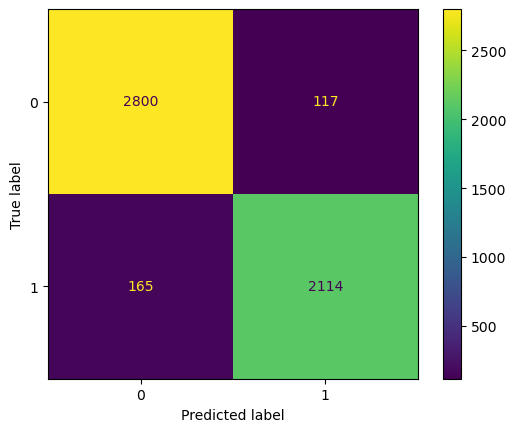

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_testpred=gb.predict(x_test)
y_trainpred=gb.predict(x_train)
print('Test score:',gb.score(x_test,y_test))
print('train score:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbt=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbt)
print('Train accuracy:',gbr)

#### Random Forest

Test score: 0.9574672825250192
train score: 0.9999518768046198
CR:               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2917
           1       0.96      0.94      0.95      2279

    accuracy                           0.96      5196
   macro avg       0.96      0.96      0.96      5196
weighted avg       0.96      0.96      0.96      5196

Test accuracy: 95.74672825250192
Train accuracy: 99.99518768046198


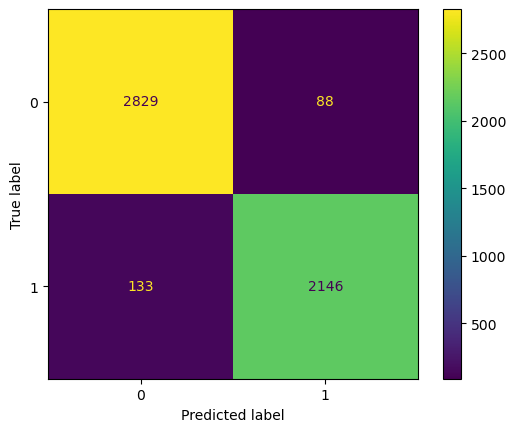

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test score:',rf.score(x_test,y_test))
print('train score:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rft=accuracy_score(y_test,y_testpred)*100
rfr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rft)
print('Train accuracy:',rfr)

### Decision Tree

Test score: 0.9372594303310239
train score: 1.0
CR:               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2917
           1       0.93      0.93      0.93      2279

    accuracy                           0.94      5196
   macro avg       0.94      0.94      0.94      5196
weighted avg       0.94      0.94      0.94      5196

Test accuracy: 93.72594303310238
Train accuracy: 100.0


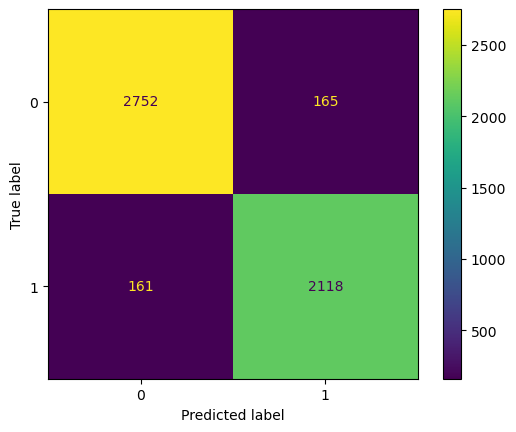

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test score:',dt.score(x_test,y_test))
print('train score:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtt=accuracy_score(y_test,y_testpred)*100
dtr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtt)
print('Train accuracy:',dtr)

### SVM

Test score: 0.9489992301770592
train score: 0.9541385948026949
CR:               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2917
           1       0.95      0.93      0.94      2279

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196

Test accuracy: 94.89992301770592
Train accuracy: 95.4138594802695


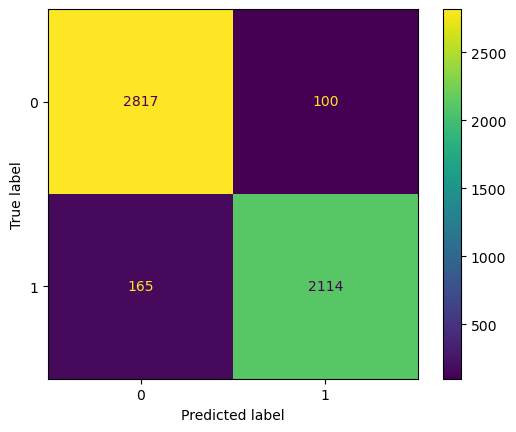

In [86]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_testpred=svm.predict(x_test)
y_trainpred=svm.predict(x_train)
print('Test score:',svm.score(x_test,y_test))
print('train score:',svm.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svt=accuracy_score(y_test,y_testpred)*100
svr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svt)
print('Train accuracy:',svr)

### x gboosting

Test score: 0.9620862201693611
train score: 0.9939364773820981
CR:               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2917
           1       0.97      0.94      0.96      2279

    accuracy                           0.96      5196
   macro avg       0.96      0.96      0.96      5196
weighted avg       0.96      0.96      0.96      5196

Test accuracy: 96.2086220169361
Train accuracy: 99.39364773820981


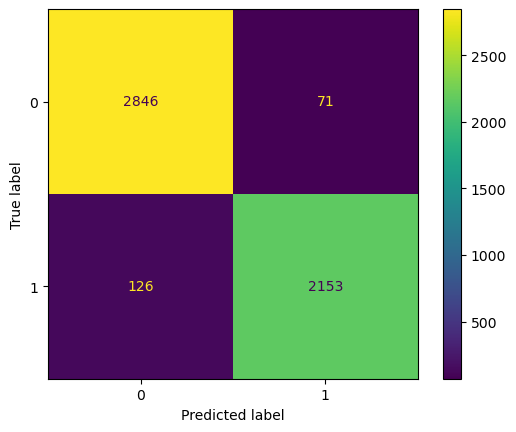

In [88]:
from xgboost import XGBClassifier 
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test score:',xgb.score(x_test,y_test))
print('train score:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgt=accuracy_score(y_test,y_testpred)*100
xgr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgt)
print('Train accuracy:',xgr)

### Adaboosting

Test score: 0.9318706697459584
train score: 0.9270933589990376
CR:               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2917
           1       0.93      0.91      0.92      2279

    accuracy                           0.93      5196
   macro avg       0.93      0.93      0.93      5196
weighted avg       0.93      0.93      0.93      5196

Test accuracy: 93.18706697459585
Train accuracy: 92.70933589990375


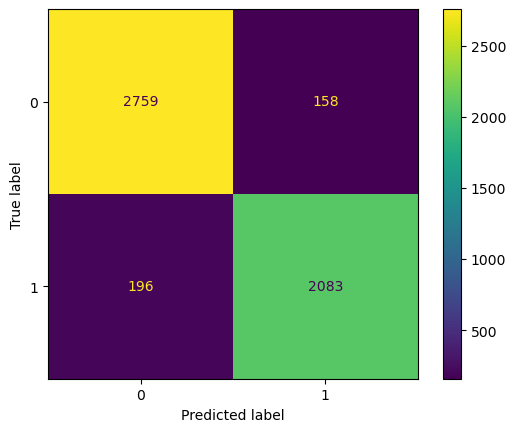

In [90]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
y_testpred=adb.predict(x_test)
y_trainpred=adb.predict(x_train)
print('Test score:',adb.score(x_test,y_test))
print('train score:',adb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adt=accuracy_score(y_test,y_testpred)*100
adr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adt)
print('Train accuracy:',adr)

### Naive Bayes

Test score: 0.8664357197844496
train score: 0.8637632338787296
CR:               precision    recall  f1-score   support

           0       0.87      0.90      0.88      2917
           1       0.86      0.83      0.84      2279

    accuracy                           0.87      5196
   macro avg       0.87      0.86      0.86      5196
weighted avg       0.87      0.87      0.87      5196

Test accuracy: 86.64357197844495
Train accuracy: 86.37632338787296


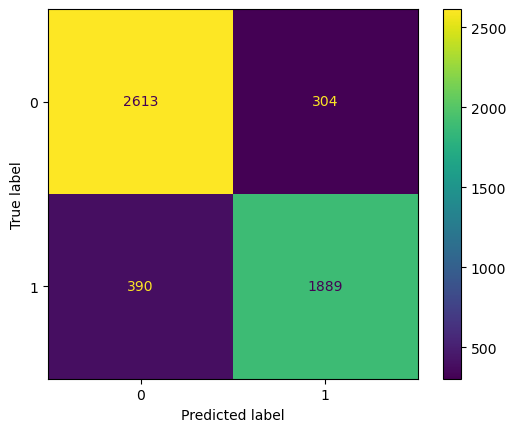

In [92]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_testpred=nb.predict(x_test)
y_trainpred=nb.predict(x_train)
print('Test score:',nb.score(x_test,y_test))
print('train score:',nb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
nbt=accuracy_score(y_test,y_testpred)*100
nbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',nbt)
print('Train accuracy:',nbr)

### initial performance

In [94]:
tb=pd.DataFrame()
tb['model']=pd.Series(['lr','knn','gb','rf','dt','svm','xgb','adb','nb'])
tb['test_accuracy']=pd.Series([lrt,knnt,gbt,rft,dtt,svt,xgt,adt,nbt])
tb['train_accuracy']=pd.Series([lrr,knnr,gbr,rfr,dtr,svr,xgr,adr,nbr])
tb

model  test_accuracy  train_accuracy
0    lr      87.201694       87.112608
1   knn      91.897614       93.970164
2    gb      94.572748       94.384023
3    rf      95.746728       99.995188
4    dt      93.725943      100.000000
5   svm      94.899923       95.413859
6   xgb      96.208622       99.393648
7   adb      93.187067       92.709336
8    nb      86.643572       86.376323

### SMOTE

In [96]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)
print("After SMOTE:", Counter(y_resampled))

After SMOTE: Counter({1: 14573, 0: 14573})


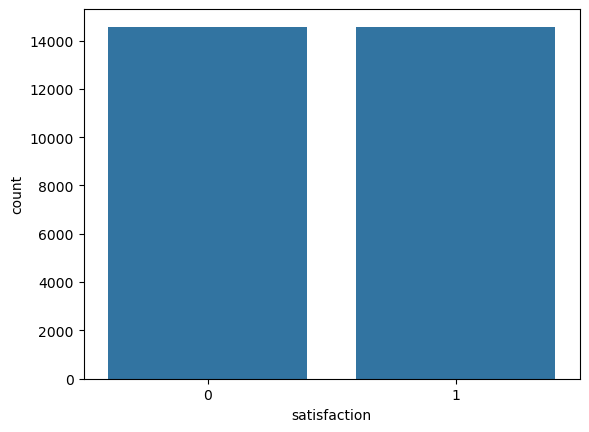

In [97]:
sns.countplot(data=data,x=y_resampled)
plt.show()

In [ ]:
# after smote fitting models

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=40)

### Logistic Regression

In [100]:
lr=LogisticRegression()
lr.fit(X_resampled,y_resampled)

LogisticRegression()

Test score: 0.8620926243567753
train score: 0.8680734259735804
CR:               precision    recall  f1-score   support

           0       0.86      0.88      0.87      2991
           1       0.87      0.84      0.86      2839

    accuracy                           0.86      5830
   macro avg       0.86      0.86      0.86      5830
weighted avg       0.86      0.86      0.86      5830

Test accuracy: 86.20926243567753
Train accuracy: 86.80734259735804


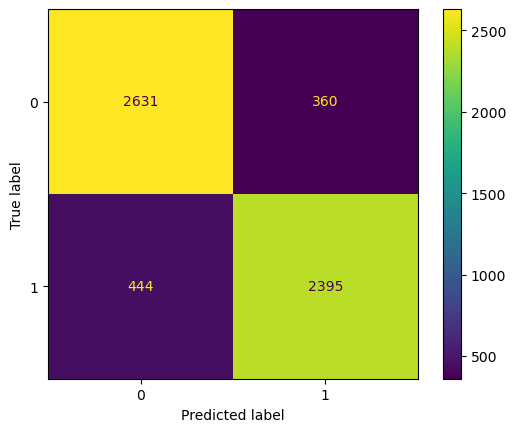

In [101]:
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test score:',lr.score(x_test,y_test))
print('train score:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrto=accuracy_score(y_test,y_testpred)*100
lrro=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrto)
print('Train accuracy:',lrro)

### KNN

In [103]:
knn=KNeighborsClassifier()
knn.fit(X_resampled,y_resampled)

KNeighborsClassifier()

Test score: 0.9543739279588336
train score: 0.9512352032938755
CR:               precision    recall  f1-score   support

           0       0.95      0.96      0.96      2991
           1       0.96      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 95.43739279588335
Train accuracy: 95.12352032938755


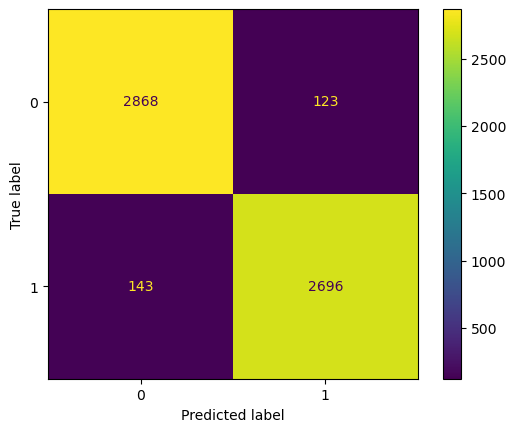

In [104]:
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test score:',knn.score(x_test,y_test))
print('train score:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnto=accuracy_score(y_test,y_testpred)*100
knnro=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnto)
print('Train accuracy:',knnro)

### Gradient Boosting

In [106]:
gb=GradientBoostingClassifier()
gb.fit(X_resampled,y_resampled)

GradientBoostingClassifier()

Test score: 0.9502572898799314
train score: 0.9490907531308972
CR:               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2991
           1       0.95      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 95.02572898799315
Train accuracy: 94.90907531308972


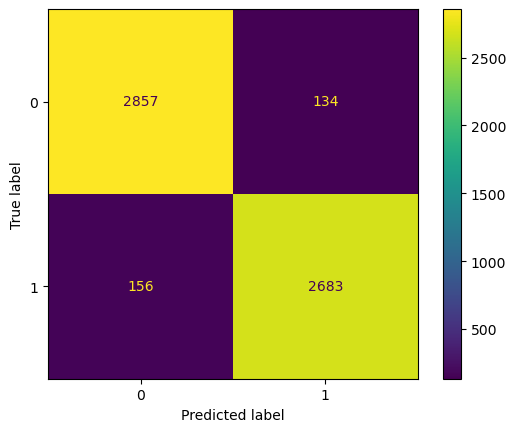

In [107]:
y_testpred=gb.predict(x_test)
y_trainpred=gb.predict(x_train)
print('Test score:',gb.score(x_test,y_test))
print('train score:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbto=accuracy_score(y_test,y_testpred)*100
gbro=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbto)
print('Train accuracy:',gbro)

### Random Forest

In [109]:
rf=RandomForestClassifier()
rf.fit(X_resampled,y_resampled)

RandomForestClassifier()

Test score: 1.0
train score: 1.0
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2991
           1       1.00      1.00      1.00      2839

    accuracy                           1.00      5830
   macro avg       1.00      1.00      1.00      5830
weighted avg       1.00      1.00      1.00      5830

Test accuracy: 100.0
Train accuracy: 100.0


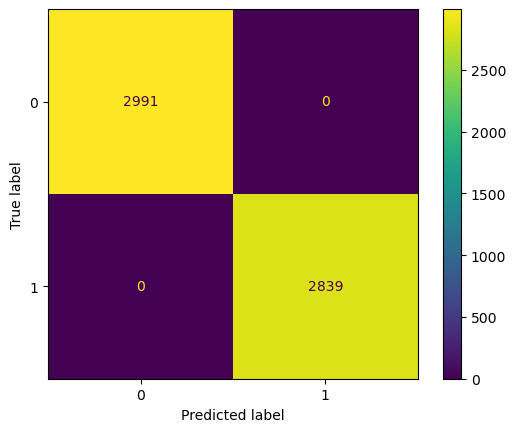

In [110]:

y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test score:',rf.score(x_test,y_test))
print('train score:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rfto=accuracy_score(y_test,y_testpred)*100
rfro=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rfto)
print('Train accuracy:',rfro)

### decision Tree

In [112]:
dt=DecisionTreeClassifier()
dt.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

Test score: 1.0
train score: 1.0
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2991
           1       1.00      1.00      1.00      2839

    accuracy                           1.00      5830
   macro avg       1.00      1.00      1.00      5830
weighted avg       1.00      1.00      1.00      5830

Test accuracy: 100.0
Train accuracy: 100.0


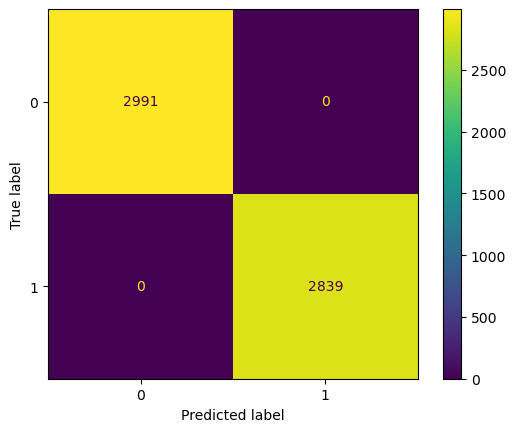

In [113]:
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test score:',dt.score(x_test,y_test))
print('train score:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtto=accuracy_score(y_test,y_testpred)*100
dtro=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtto)
print('Train accuracy:',dtro)

### SVM

In [115]:
svc=SVC()
svc.fit(X_resampled,y_resampled)

SVC()

Test score: 0.9566037735849057
train score: 0.9549665465774575
CR:               precision    recall  f1-score   support

           0       0.95      0.96      0.96      2991
           1       0.96      0.95      0.96      2839

    accuracy                           0.96      5830
   macro avg       0.96      0.96      0.96      5830
weighted avg       0.96      0.96      0.96      5830

Test accuracy: 95.66037735849056
Train accuracy: 95.49665465774575


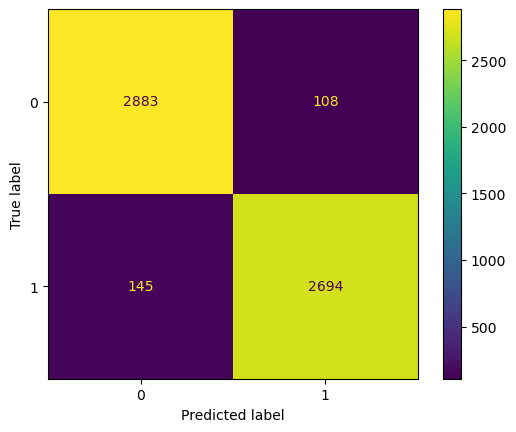

In [116]:
y_testpred=svc.predict(x_test)
y_trainpred=svc.predict(x_train)
print('Test score:',svc.score(x_test,y_test))
print('train score:',svc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svto=accuracy_score(y_test,y_testpred)*100
svro=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svto)
print('Train accuracy:',svro)

### X gboosting

In [118]:
xgb=XGBClassifier()
xgb.fit(X_resampled,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Test score: 0.9941680960548885
train score: 0.9909504203122319
CR:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2991
           1       1.00      0.99      0.99      2839

    accuracy                           0.99      5830
   macro avg       0.99      0.99      0.99      5830
weighted avg       0.99      0.99      0.99      5830

Test accuracy: 99.41680960548885
Train accuracy: 99.09504203122319


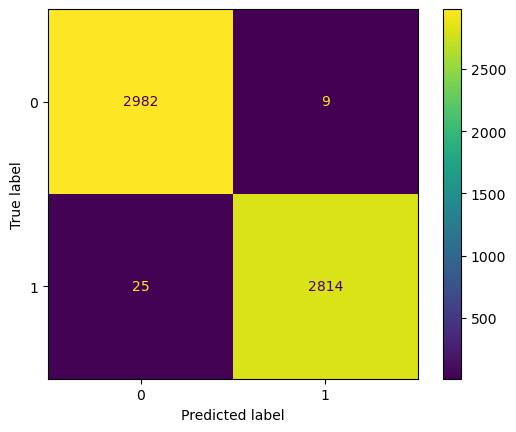

In [119]:
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test score:',xgb.score(x_test,y_test))
print('train score:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgto=accuracy_score(y_test,y_testpred)*100
xgro=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgto)
print('Train accuracy:',xgro)

### Ada Boosting

In [121]:
adb=AdaBoostClassifier()
adb.fit(X_resampled,y_resampled)

AdaBoostClassifier()

Test score: 0.9272727272727272
train score: 0.932878709898782
CR:               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2991
           1       0.93      0.92      0.93      2839

    accuracy                           0.93      5830
   macro avg       0.93      0.93      0.93      5830
weighted avg       0.93      0.93      0.93      5830

Test accuracy: 92.72727272727272
Train accuracy: 93.2878709898782


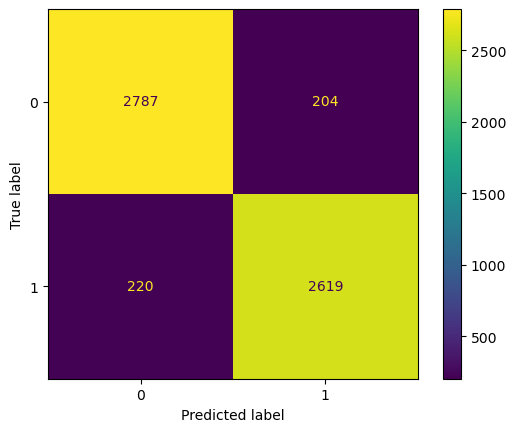

In [122]:
y_testpred=adb.predict(x_test)
y_trainpred=adb.predict(x_train)
print('Test score:',adb.score(x_test,y_test))
print('train score:',adb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adto=accuracy_score(y_test,y_testpred)*100
adro=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adto)
print('Train accuracy:',adro)

### Naive Bayes

In [124]:
nb=GaussianNB()
nb.fit(X_resampled,y_resampled)

GaussianNB()

Test score: 0.8543739279588336
train score: 0.8606107394064162
CR:               precision    recall  f1-score   support

           0       0.84      0.89      0.86      2991
           1       0.87      0.82      0.85      2839

    accuracy                           0.85      5830
   macro avg       0.86      0.85      0.85      5830
weighted avg       0.86      0.85      0.85      5830

Test accuracy: 85.43739279588335
Train accuracy: 86.06107394064162


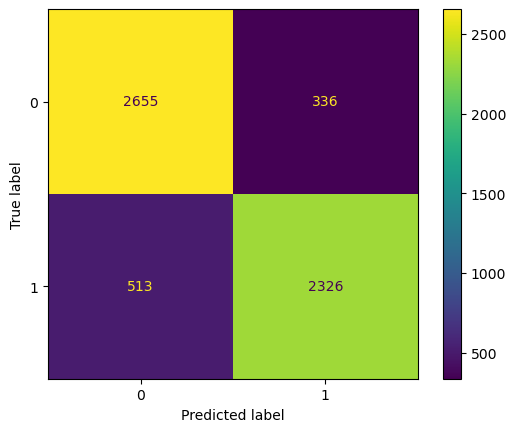

In [125]:
y_testpred=nb.predict(x_test)
y_trainpred=nb.predict(x_train)
print('Test score:',nb.score(x_test,y_test))
print('train score:',nb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
nbto=accuracy_score(y_test,y_testpred)*100
nbro=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',nbto)
print('Train accuracy:',nbro)


### after smoting performance table

In [127]:
tb=pd.DataFrame()
tb['model']=pd.Series(['lr','knn','gb','rf','dt','svm','xgb','adb','nb'])
tb['test_accuracy']=pd.Series([lrto,knnto,gbto,rfto,dtto,svto,xgto,adto,nbto])
tb['train_accuracy']=pd.Series([lrro,knnro,gbro,rfro,dtro,svro,xgro,adro,nbro])
tb

model  test_accuracy  train_accuracy
0    lr      86.209262       86.807343
1   knn      95.437393       95.123520
2    gb      95.025729       94.909075
3    rf     100.000000      100.000000
4    dt     100.000000      100.000000
5   svm      95.660377       95.496655
6   xgb      99.416810       99.095042
7   adb      92.727273       93.287871
8    nb      85.437393       86.061074

## hyper parameter tunning

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
# LOGITIC REGRESSION
# ----------------------
lr_params={'C':[0.1,1,10]}
lr_grid=GridSearchCV(LogisticRegression(),lr_params,cv=5)
lr_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  

In [132]:
knn_param = {
    'n_neighbors': range(1, 31),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Voting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}
knn_grid= GridSearchCV(knn,knn_param, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [249]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()
gb_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
gb_grid = GridSearchCV(gb, gb_param, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [257]:
# SVM
svm_params={'C':[0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale','auto']}
svm_grid=GridSearchCV(SVC(),svm_params,cv=5)
svm_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [251]:
# RANDOM FOREST
rf_params={'n_estimators':[10,50,100],'max_depth':[2,4,6,None]}
rf_grid=GridSearchCV(RandomForestClassifier(random_state=42),rf_params,cv=5)
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, None],
                         'n_estimators': [10, 50, 100]})

In [252]:
# DECISION TREE
dt_params={'max_depth':[2,4,6,None],'criterion':['gini','entropy']}
dt_grid=GridSearchCV(DecisionTreeClassifier(random_state=42),dt_params,cv=5)
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, None]})

In [253]:
xgb_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
xgb_grid = GridSearchCV(xgb,xgb_param , cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [254]:
# AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada_grid = GridSearchCV(AdaBoostClassifier(random_state=42), ada_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
ada_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [255]:
# Naive Bayes
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
nb_grid = GridSearchCV(GaussianNB(), nb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
nb_grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy')

In [277]:
models = {
    'Random Forest': rf_grid,
    'Logistic Regression': lr_grid,
    'Decision Tree': dt_grid, 
    'KNeighborsClassifier':knn_grid,
    'GradientBoostingClassifier':gb_grid,
    'svm':svm_grid,
    'XGBClassifier':xgb_grid,
    'adaboostclassifier':ada_grid,
    'Naive Bayes':nb_grid 
    # 'SVMClassifier':svm_grid  
}
for name, grid in models.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Best Params: {grid.best_params_}")
    print(f"  Accuracy: {acc:.4f}\n")

Random Forest:
  Best Params: {'max_depth': None, 'n_estimators': 100}
  Accuracy: 0.9588

Logistic Regression:
  Best Params: {'C': 0.1}
  Accuracy: 0.8605

Decision Tree:
  Best Params: {'criterion': 'entropy', 'max_depth': None}
  Accuracy: 0.9403

KNeighborsClassifier:
  Best Params: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
  Accuracy: 0.9383

GradientBoostingClassifier:
  Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 300}
  Accuracy: 0.9666

svm:
  Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
  Accuracy: 0.9530

XGBClassifier:
  Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}
  Accuracy: 0.9633

adaboostclassifier:
  Best Params: {'learning_rate': 1, 'n_estimators': 200}
  Accuracy: 0.9302

Naive Bayes:
  Best Params: {'var_smoothing': 1e-09}
  Accuracy: 0.8544



### Applying multiple ML models After Hyperparameter Tuning

### Logistic regression

Test accuracy: 0.860548885077187
train accuracy: 0.8688454280322525
CR:               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2991
           1       0.95      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 86.0548885077187
Train accuracy: 86.88454280322524


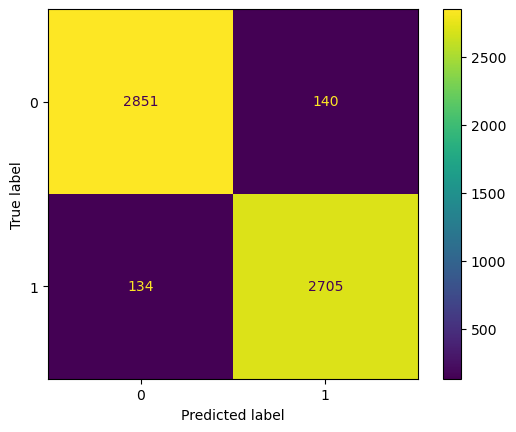

In [363]:
lr=LogisticRegression(C=0.1)
lr.fit(x_train,y_train)
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test accuracy:',lr.score(x_test,y_test))
print('train accuracy:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
lrth=accuracy_score(y_test,y_testpred)*100
lrrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrth)
print('Train accuracy:',lrrh)

### knn

Test accuracy: 0.9382504288164666
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2991
           1       0.95      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 93.82504288164665
Train accuracy: 100.0


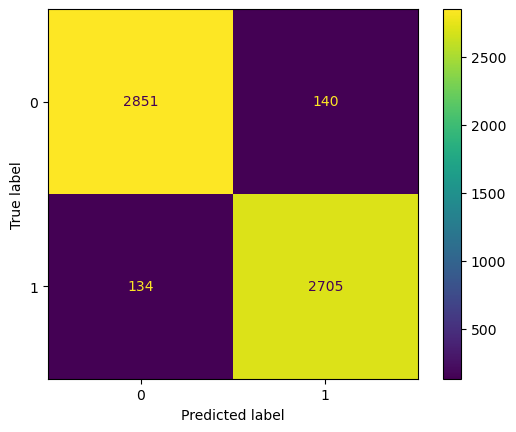

In [365]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')
knn.fit(x_train,y_train)
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
knnth=accuracy_score(y_test,y_testpred)*100
knnrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnth)
print('Train accuracy:',knnrh)

### Gradient Boosting

Test accuracy: 0.9662092624356775
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2991
           1       0.95      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 96.62092624356775
Train accuracy: 100.0


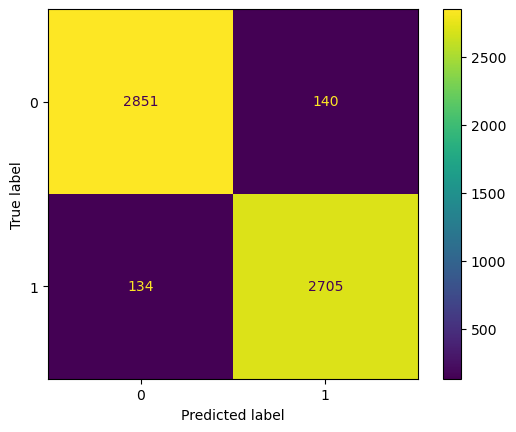

In [369]:
gbc=GradientBoostingClassifier(learning_rate= 0.1,max_depth=7,min_samples_split= 5, n_estimators= 300)
gbc.fit(x_train,y_train)
y_testpred=gbc.predict(x_test)
y_trainpred=gbc.predict(x_train)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
gbth=accuracy_score(y_test,y_testpred)*100
gbrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbth)
print('Train accuracy:',gbrh)

### Random Forest

Test accuracy: 0.9593481989708404
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2991
           1       0.95      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 95.93481989708404
Train accuracy: 100.0


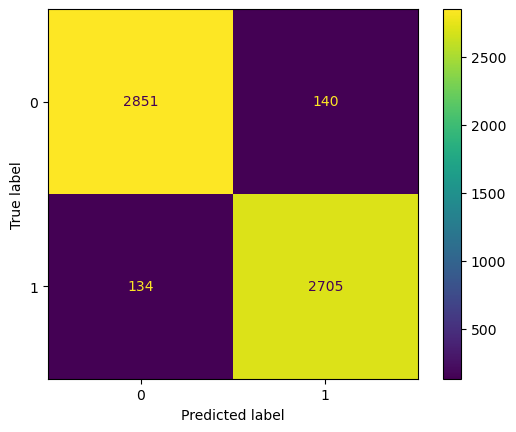

In [368]:
rf=RandomForestClassifier(max_depth=None,n_estimators=100)
rf.fit(x_train,y_train)
y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
rfth=accuracy_score(y_test,y_testpred)*100
rfrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rfth)
print('Train accuracy:',rfrh)

### Decision Tree

Test accuracy: 0.941852487135506
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2991
           1       0.95      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 94.18524871355059
Train accuracy: 100.0


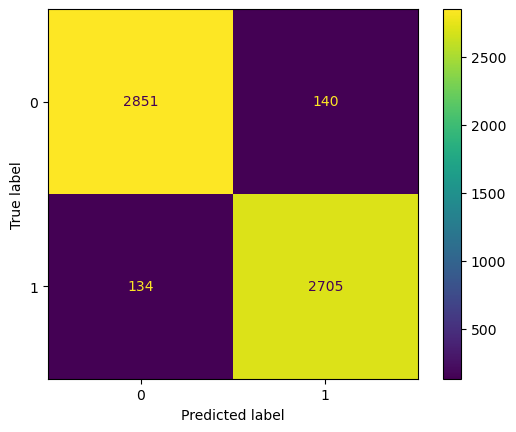

In [371]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth= None)
dt.fit(x_train,y_train)
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
dtth=accuracy_score(y_test,y_testpred)*100
dtrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtth)
print('Train accuracy:',dtrh)

### support vector classifier

Test accuracy: 0.9530017152658662
Train accuracy: 0.9807428375364556
CR:               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2991
           1       0.95      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 95.30017152658662
Train accuracy: 98.07428375364556


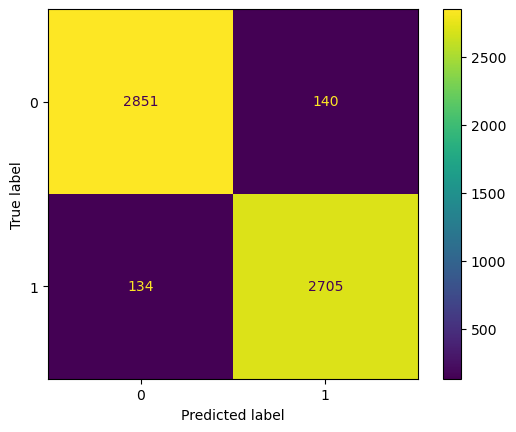

In [376]:
svm = SVC(C=10,gamma='scale',kernel='rbf')
svm.fit(x_train, y_train)
y_testpred=svm.predict(x_test)
y_trainpred=svm.predict(x_train)
print('Test accuracy:', svm.score(x_test, y_test))
print('Train accuracy:', svm.score(x_train, y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print('CR:', classification_report(y_test, y_pred))
svmth=accuracy_score(y_test,y_testpred)*100
svmrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svmth)
print('Train accuracy:',svmrh)

### XGB

Test accuracy: 0.9632933104631218
train accuracy: 0.9984988848859152
CR:               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2991
           1       0.95      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 96.32933104631218
Train accuracy: 99.84988848859152


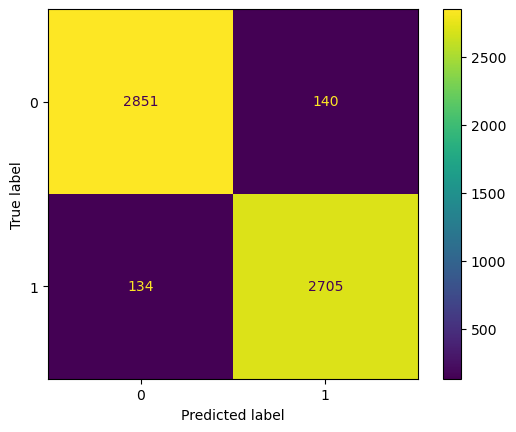

In [378]:
xgb=XGBClassifier(learning_rate= 0.1,max_depth= 7,min_samples_split=2,n_estimators=300)
xgb.fit(x_train,y_train)
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test accuracy:',xgb.score(x_test,y_test))
print('train accuracy:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
xgbth=accuracy_score(y_test,y_testpred)*100
xgbrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgbth)
print('Train accuracy:',xgbrh)

### ADB

Test accuracy: 0.930188679245283
Train accuracy: 0.936309830159547
CR:               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2991
           1       0.95      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 93.01886792452831
Train accuracy: 93.63098301595471


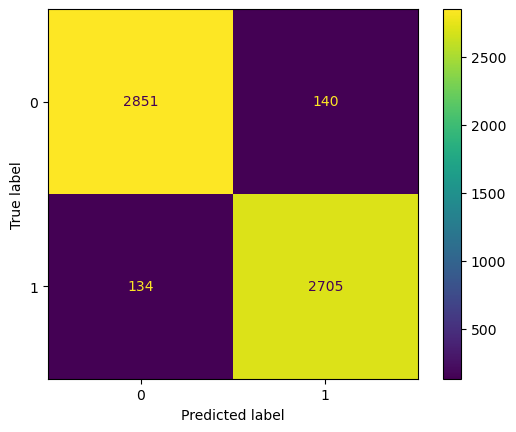

In [380]:
adb = AdaBoostClassifier(learning_rate=1,n_estimators=200)
adb.fit(x_train, y_train)
y_testpred=adb.predict(x_test)
y_trainpred=adb.predict(x_train)
print('Test accuracy:', adb.score(x_test, y_test))
print('Train accuracy:', adb.score(x_train, y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print('CR:', classification_report(y_test, y_pred))
adbth=accuracy_score(y_test,y_testpred)*100
adbrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adbth)
print('Train accuracy:',adbrh)

### Naive bayes

Test accuracy: 0.8543739279588336
Train accuracy: 0.8599245153542632
CR:               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2991
           1       0.95      0.95      0.95      2839

    accuracy                           0.95      5830
   macro avg       0.95      0.95      0.95      5830
weighted avg       0.95      0.95      0.95      5830

Test accuracy: 85.43739279588335
Train accuracy: 85.99245153542631


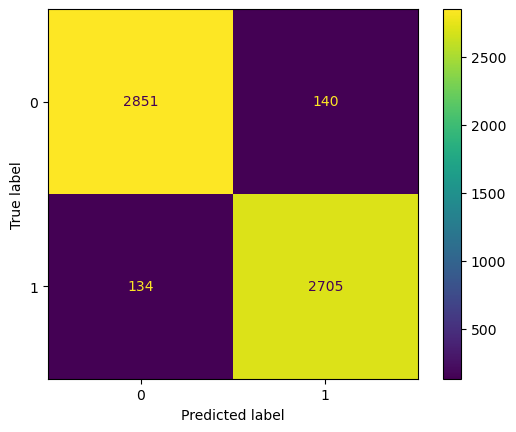

In [382]:
nb = GaussianNB(var_smoothing=1e-09)
nb.fit(x_train, y_train)
y_testpred=nb.predict(x_test)
y_trainpred=nb.predict(x_train)
print('Test accuracy:', nb.score(x_test, y_test))
print('Train accuracy:', nb.score(x_train, y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print('CR:', classification_report(y_test, y_pred))
nabth=accuracy_score(y_test,y_testpred)*100
nabrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',nabth)
print('Train accuracy:',nabrh)

### after hyper parameter tunning

In [384]:
tb=pd.DataFrame()
tb['model']=pd.Series(['lr','knn','gb','rf','dt','svm','xgb','adb','nb'])
tb['test_accuracy']=pd.Series([lrth,knnth,gbth,rfth,dtth,svmth,xgbth,adbth,nabth])
tb['train_accuracy']=pd.Series([lrrh,knnrh,gbrh,rfrh,dtrh,svmrh,xgbrh,adbrh,nabrh])
tb

model  test_accuracy  train_accuracy
0    lr      86.054889       86.884543
1   knn      93.825043      100.000000
2    gb      96.620926      100.000000
3    rf      95.934820      100.000000
4    dt      94.185249      100.000000
5   svm      95.300172       98.074284
6   xgb      96.329331       99.849888
7   adb      93.018868       93.630983
8    nb      85.437393       85.992452

### Deployment

In [388]:
import joblib 
joblib.dump(xgb,"air line passenge.pkl")

['air line passenge.pkl']

In [392]:
joblib.dump(sc,"scaler.pkl")

['scaler.pkl']

In [394]:
joblib.dump(le,"le.pkl")

['le.pkl']

In [396]:
joblib.dump(le1,"le1.pkl")

['le1.pkl']

In [398]:
joblib.dump(le2,"le2.pkl")

['le2.pkl']

In [400]:
joblib.dump(le3,"le3.pkl")

['le3.pkl']

In [402]:
joblib.dump(le4,"le4.pkl")

['le4.pkl']